Etapes de segmentation des images

1. Preprocessing des images
Cette étape utilise la magnitude du gradient et l'orientation du gradient d'une image à partir de l'utilisation d'un filtre





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import glob
import cv2 as cv
from PIL import Image
import os.path
import numpy as np
import skimage.exposure

In [2]:

#Importation de l'image
#Lecture des images en mode noir et blanc ou couleurs
#transformation del'image couleur en noir et blanc

image_path = '/home/caroline/caroline/FORMATION/Datascientest/Projet_Blood_Cell/datasets/PBC_dataset_normal_DIB/basophil/BA_28660.jpg'
img = cv.imread(image_path)
img_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
img_color = cv.imread(image_path, cv.IMREAD_COLOR)
img_gray2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#Definir le type des images
print('le type de img_gray est :', type(img_gray))
print('le type de img_color est :', type(img_color))

# Definir les dimensions des images
print(img_color.shape)
print(img_gray.shape)

#histogramme en noir et blanc
hist_full = cv.calcHist([img_gray2],[0],None,[256],[0,256])

#Affichage des images et histogrammes
plt.subplot(421), plt.imshow(img_color, 'gray'), plt.title('Color')
plt.subplot(422), plt.imshow(img_gray, 'gray'), plt.title('White')
plt.subplot(424), plt.plot(hist_full), plt.title('White')
plt.xlim([0,256])

#histogramme en couleurs
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(423), plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title('RGB')




error: ignored

In [ ]:
#Transformation de l'image de RGB -> HSV.

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#Déclaration des couleurs des courbes
color = ('r','g','b')
#Déclaration des noms des courbes.
labels = ('h','s','v')
#Pour col allant r à b et pour i allant de 0 au nombre de couleurs
for i,col in enumerate(color):
    #Hist prend la valeur de l'histogramme de hsv sur la canal i.
    hist = cv.calcHist([hsv],[i],None,[256],[0,256])
    # Plot de hist.
    plt.subplot(425),plt.plot(hist,color = col,label=labels[i])
    plt.title('HSV')
    plt.legend()
    plt.xlim([0,256])
#Affichage.
# plt.show()




In [ ]:
#Seuillage d'otsu
h,s,v= cv.split(hsv)
ret_h, th_h = cv.threshold(h,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret_s, th_s = cv.threshold(s,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret_v, th_v = cv.threshold(s,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
cv.imwrite("th_h.png",th_h)
cv.imwrite("th_s.png",th_s)
cv.imwrite("th_v.png",th_v)

# On constate que la teinte et la saturation nous permette de segmenter les cellules

# plt.imshow('th_h.png', th_h)

In [3]:
# # img = cv2.imread('BA_28660', cv2.IMREAD_GRAYSCALE)
# img_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
# img_gray = cv.GaussianBlur(img_gray, (0, 0), sigmaX=1.5, sigmaY=1.5)

# Kx = np.array([[-1, 0, 1],
#                [-2, 0, 2],
#                [-1, 0, 1]])
# Ky = np.array([[1, 2, 1],
#                [0, 0, 0],
#                [-1, -2, -1]])

# Ix = cv.filter2D(img, -1, Kx)
# Iy = cv.filter2D(img, -1, Ky)

# G = np.hypot(Ix, Iy)
# G = skimage.exposure.rescale_intensity(G, in_range='image', out_range=(0, 255)).astype(np.uint8)

# theta = np.arctan2(Iy, Ix)
# theta = skimage.exposure.rescale_intensity(theta, in_range='image', out_range=(0, 255)).astype(np.uint8)

# cv.imwrite('BA_28660_gradient_magnitude.png', G)
# # cv.imwrite('BA_28660_gradient_direction.png', theta)

# cv.imshow('magnitude', G)
# # cv.imshow("direction", theta)
# # cv.waitKey(0)


In [4]:
#Affichage des gradients : magnitude et orientation du gradient
# sur les images non seuillées

img= cv.GaussianBlur(img_gray, (3, 3), 0)

sobelx = cv.Sobel(img_gray,cv.CV_64F,1,0,ksize=5)

sobely = cv.Sobel(img_gray,cv.CV_64F,0,1,ksize=5)

abs_grad_x = cv.convertScaleAbs(sobelx)

abs_grad_y = cv.convertScaleAbs(sobely)

modgrad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

  

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')

plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(modgrad,cmap = 'gray')

plt.title('Module gradient'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')

plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')

plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()





error: ignored

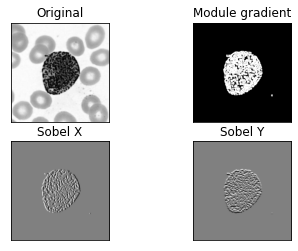

In [ ]:
# sur les images seuillées

img= cv.GaussianBlur(img_gray, (3, 3), 0)

sobelx = cv.Sobel(th_s,cv.CV_64F,1,0,ksize=5)

sobely = cv.Sobel(th_s,cv.CV_64F,0,1,ksize=5)

abs_grad_x = cv.convertScaleAbs(sobelx)

abs_grad_y = cv.convertScaleAbs(sobely)

modgrad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

  

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')

plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(modgrad,cmap = 'gray')

plt.title('Module gradient'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')

plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')

plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()
